## Task1: Load the dataset

In [239]:
import pandas as pd
import numpy as np

In [240]:
data=pd.read_csv("/content/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Task2: EDA(visualization)

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

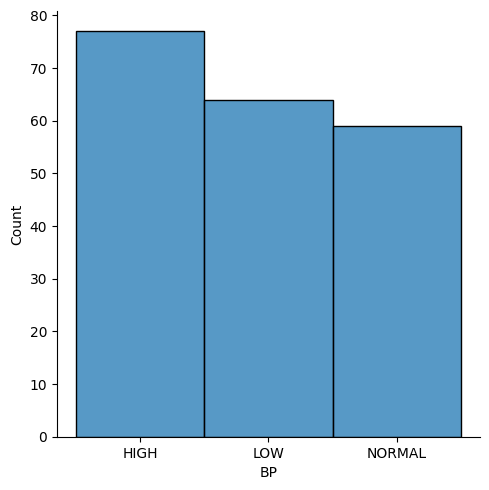

In [242]:
#Univariate Analysis

sns.displot(data.BP)

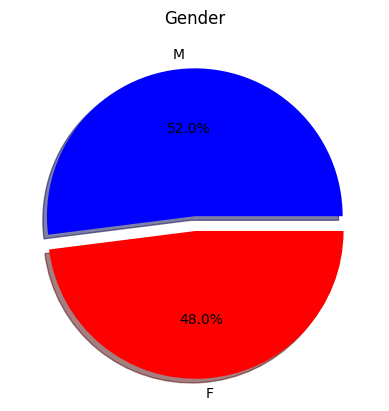

In [243]:
plt.pie(data.Sex.value_counts(),explode=[0, 0.1], labels=['M', 'F'], autopct="%1.1f%%", shadow=True, colors=['blue','red'])
plt.title("Gender")
plt.show()

<Axes: xlabel='Sex', ylabel='Na_to_K'>

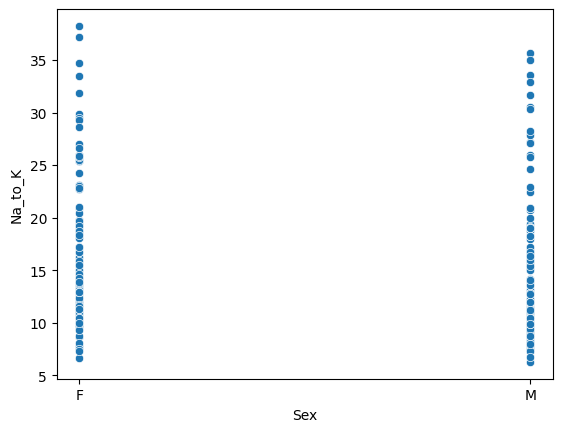

In [244]:
# Bi- Variate Analysis

sns.scatterplot(x=data.Sex,y=data.Na_to_K)

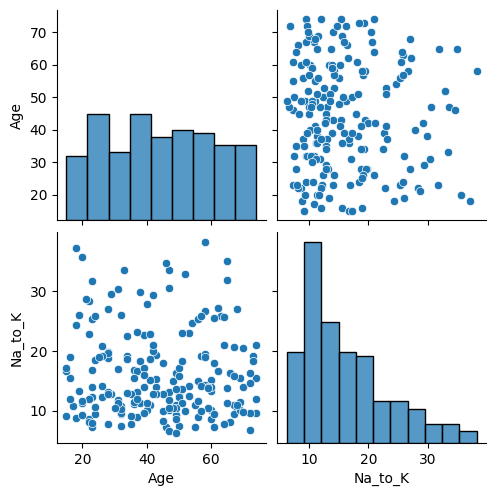

In [245]:
#Multi-Variate Analysis

sns.pairplot(data)

## Task 3: Data cleaning

In [246]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: ylabel='Na_to_K'>

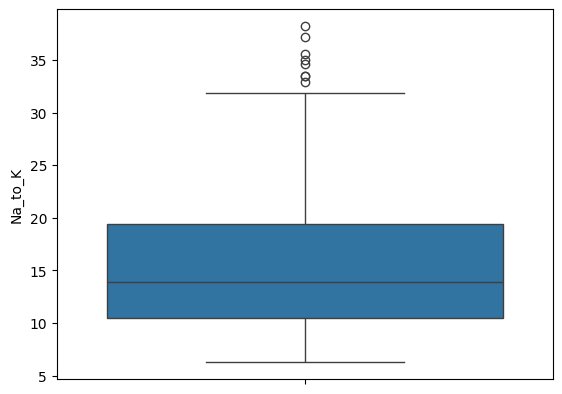

In [247]:
#Outlier Detection

sns.boxplot(data.Na_to_K)

In [248]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [249]:
IQR=19.380000-10.445500
Upper_limit=19.38+1.5*IQR
Upper_limit

32.78175

In [250]:
data.Na_to_K.median()

13.9365

In [251]:
data['Na_to_K']=np.where(data['Na_to_K']>Upper_limit,13.9,data['Na_to_K'])

<Axes: ylabel='Na_to_K'>

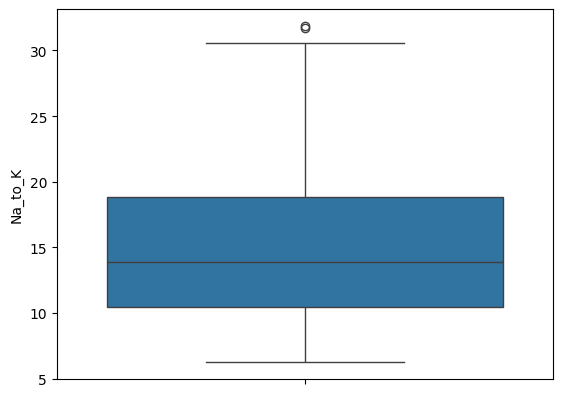

In [252]:
sns.boxplot(data.Na_to_K)

## Task4: Feature Engineering

In [253]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [254]:
# Encoding

from sklearn.preprocessing import LabelEncoder

In [255]:
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)
data.BP= le.fit_transform(data.BP)
data.Cholesterol= le.fit_transform(data.Cholesterol)

In [256]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [257]:
# x and y split

x= data.iloc[:,:-1]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [258]:
y=data.Drug
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [260]:
x_train.shape

(140, 5)

In [261]:
x_test.shape

(60, 5)

## Task5: Model Building(min. 3 models) & Evaluation

In [262]:
# Model Building

from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=10, criterion="entropy")

In [263]:
model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [264]:
y_pred=model1.predict(x_test)

In [265]:
y_pred1=model1.predict(x_train)

In [266]:
# Evaluate the model

from sklearn.metrics import accuracy_score,classification_report

In [267]:
print('Testing Accuracy = ', accuracy_score(y_test,y_pred))
print('Training Accuracy = ' , accuracy_score(y_train,y_pred1))

Testing Accuracy =  0.95
Training Accuracy =  0.9928571428571429


In [268]:
pd.crosstab(y_test,y_pred)

col_0,drugA,drugB,drugC,drugX,drugY
Drug,,,,,
drugA,5,0,0,0,0
drugB,0,3,0,0,0
drugC,0,0,3,0,1
drugX,0,0,0,18,0
drugY,1,0,0,1,28


In [269]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.75      0.86         4
       drugX       0.95      1.00      0.97        18
       drugY       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.95      0.95      0.95        60



## Task6: Model testing

In [271]:
model1.predict([[28,0,1,0,7.798]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['drugC'], dtype=object)